<a href="https://colab.research.google.com/github/mrinaldi2/pytorch_nn/blob/master/notebooks/fcc_seeds_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
cols = ["area", "perimeter", "compactness", "length", "width","asynmetry", "groove", "class"]
df = pd.read_csv("seeds_dataset.txt", names=cols, delimiter="\s+")

In [30]:
df.head()

,area,perimeter,compactness,length,width,asynmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [31]:
df['class'].unique()

array([1, 2, 3])

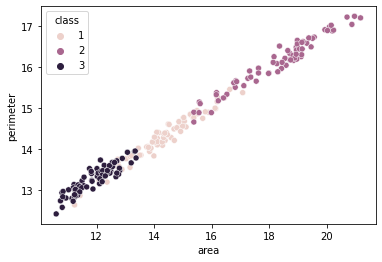

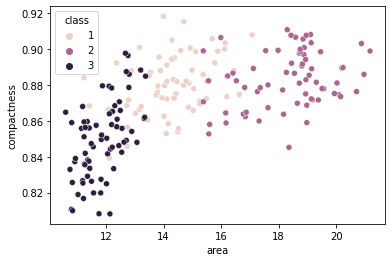

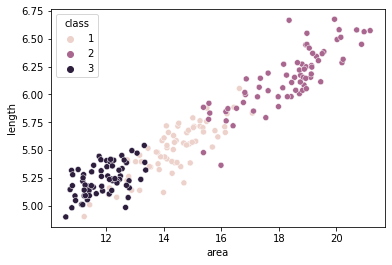

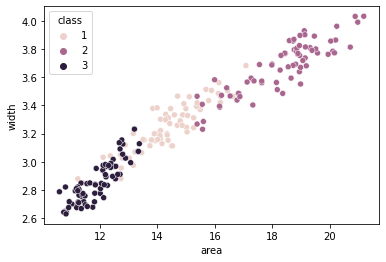

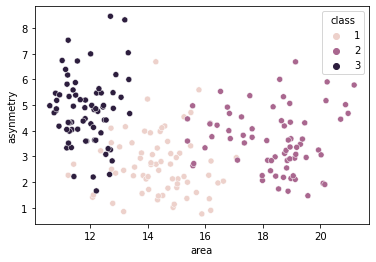

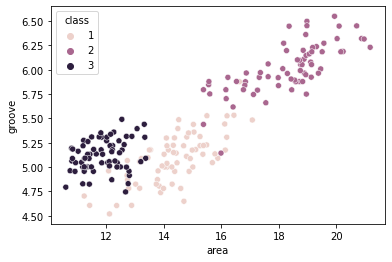

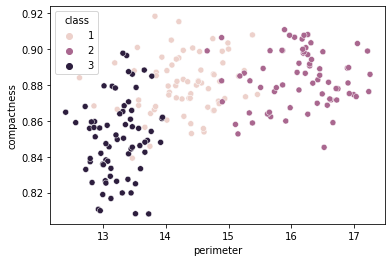

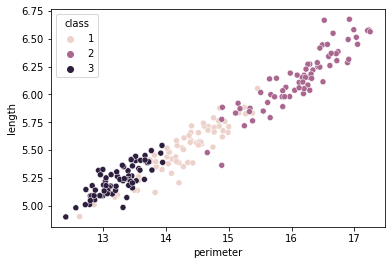

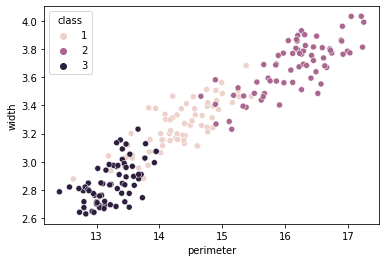

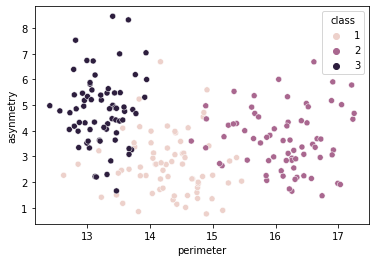

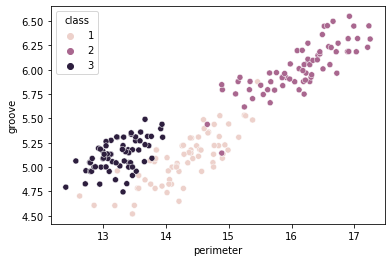

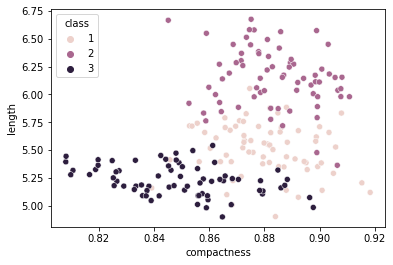

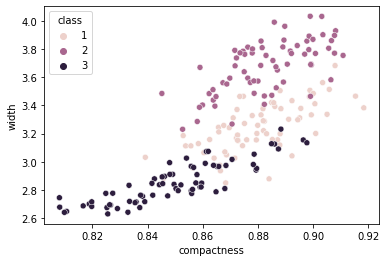

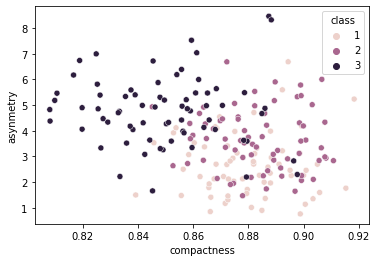

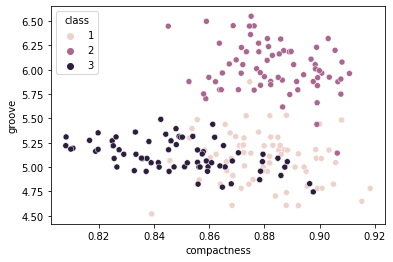

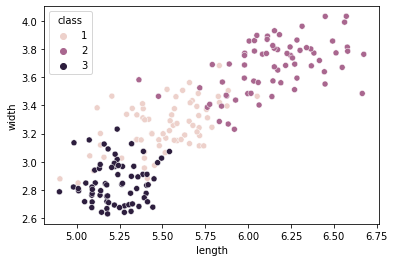

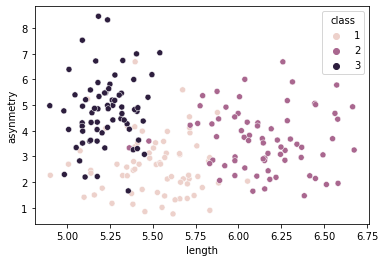

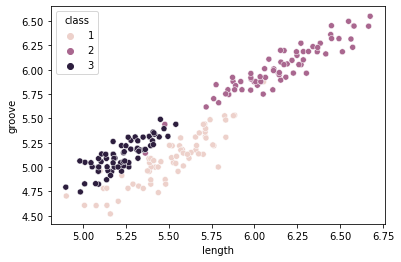

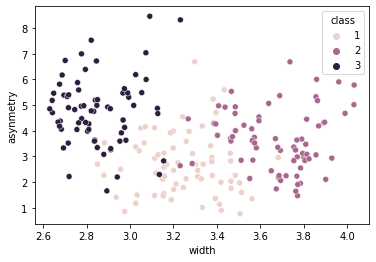

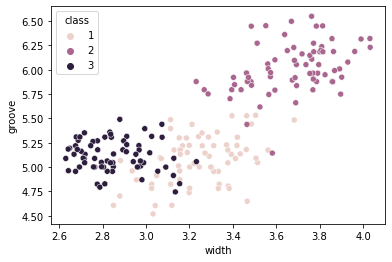

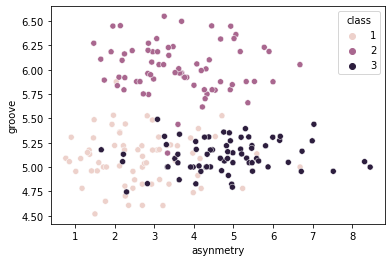

In [32]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue="class")
    plt.show()

# Clustering

In [11]:
from sklearn.cluster import KMeans

In [33]:
x = "perimeter"
y = "asynmetry"
X = df[[x,y]].values

In [34]:
kmeans = KMeans(n_clusters=3).fit(X)

In [35]:
clusters = kmeans.labels_

In [36]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2], dtype=int32)

In [37]:
df['class'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [38]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=[x,y,'class'])

[]

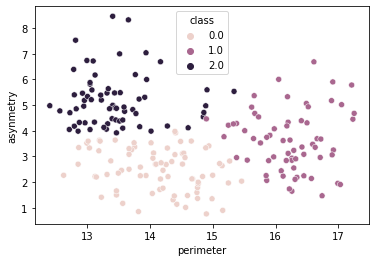

In [39]:
#K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

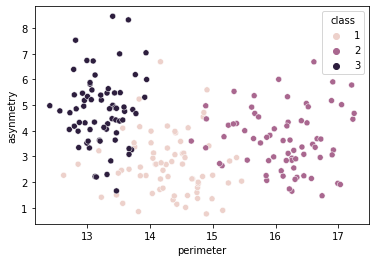

In [40]:
#Original classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

# Higer Dimensions

In [41]:
X = df[cols[:-1]].values

In [70]:
kmeans_all = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans_all.labels_.reshape(-1, 1))), columns=df.columns)

[]

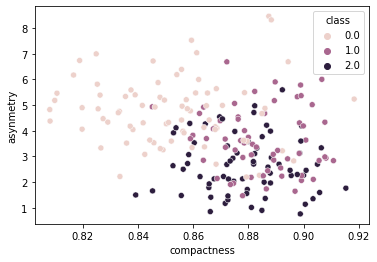

In [71]:
# K Means classes
sns.scatterplot(x='compactness', y=y, hue='class', data=cluster_df)
plt.plot()

[]

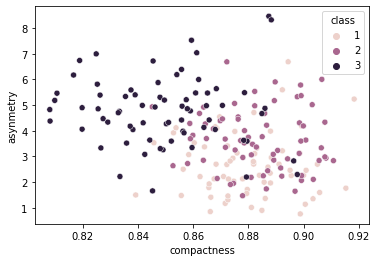

In [47]:
# Original classes
sns.scatterplot(x='compactness', y=y, hue='class', data=df)
plt.plot()

# PCA

In [48]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2)
X = df[cols[:-1]].values
transformed_x = pca.fit_transform(X)

In [53]:
X.shape

(210, 7)

In [54]:
transformed_x.shape

(210, 2)

In [55]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

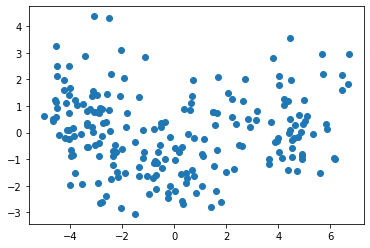

In [57]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [67]:
pca_dataframe_truth = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1,1))), columns=['x1', 'x2', 'class'])
pca_dataframe = pd.DataFrame(np.hstack((transformed_x, kmeans_all.labels_.reshape(-1,1))), columns=['x1', 'x2', 'class'])

[]

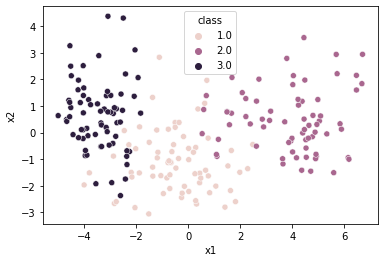

In [68]:
# Original classes
sns.scatterplot(x='x1', y='x2', hue='class', data=pca_dataframe_truth)
plt.plot()

[]

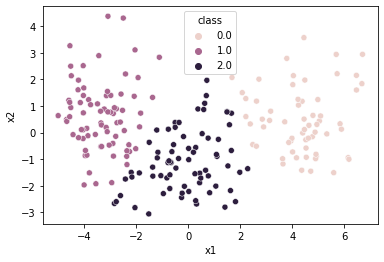

In [69]:
# Original classes
sns.scatterplot(x='x1', y='x2', hue='class', data=pca_dataframe)
plt.plot()